# Import e Algumas funções

In [66]:
import pandas as pd
data = pd.read_csv('happyscore_income.csv')
data

0      31.445556
1      42.720000
2      45.475556
3      30.296250
4      35.285000
         ...    
106    45.014444
107    39.242500
108    63.726667
109    55.120000
110    43.150000
Name: income_inequality, Length: 111, dtype: float64

In [7]:
happy = data['happyScore']
income = data['avg_income']
income.max()

26182.275

In [8]:
import matplotlib.pyplot as plt

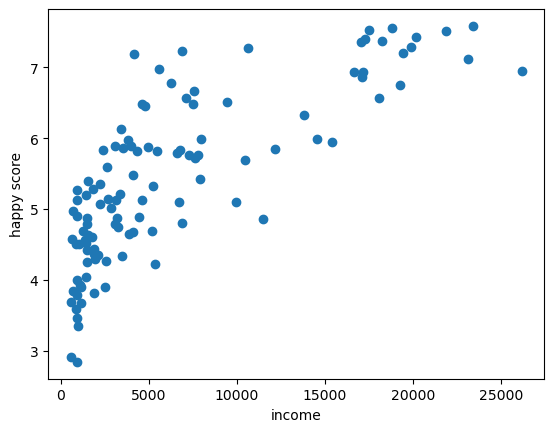

In [9]:
plt.xlabel('income')
plt.ylabel('happy score')
plt.scatter(income, happy)

# Classificação e Filtros

In [50]:
data.sort_values('avg_income', inplace = True)

richest = data[data['avg_income'] > 15000]

In [51]:
richest.iloc[0]

country                             Italy
adjusted_satisfaction                57.0
avg_satisfaction                      6.6
std_satisfaction                     1.81
avg_income                      15437.595
median_income                    13163.07
income_inequality                34.12625
region                   'Western Europe'
happyScore                          5.948
GDP                               1.25114
country.1                           Italy
Name: 49, dtype: object

In [52]:
richest.iloc[0:5]

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
49,Italy,57.0,6.6,1.81,15437.595,13163.070,34.12625,'Western Europe',5.948,1.25114,Italy
44,Ireland,64.0,7.5,1.85,16657.770,13823.160,32.41875,'Western Europe',6.940,1.33596,Ireland
90,Sweden,67.0,7.8,1.72,17032.755,15166.605,26.95000,'Western Europe',7.364,1.33171,Sweden
36,United Kingdom,60.0,7.1,1.98,17099.550,14172.735,34.43250,'Western Europe',6.867,1.26637,United Kingdom
7,Belgium,63.0,7.2,1.72,17168.505,15166.455,28.74500,'Western Europe',6.937,1.30782,Belgium


# Labelling Points on a Graph

Text(26182.275, 6.946000000000001, 'Luxembourg')

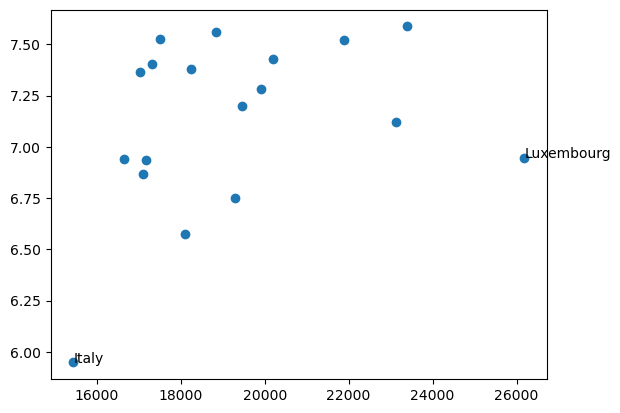

In [53]:
plt.scatter(richest['avg_income'], richest['happyScore'])

plt.text(richest.iloc[0]['avg_income'],
         richest.iloc[0]['happyScore'],
         richest.iloc[0]['country'])
plt.text(richest.iloc[-1]['avg_income'],
         richest.iloc[-1]['happyScore'],
         richest.iloc[-1]['country'])

# Labelling all the Points on a Graph

In [ ]:
plt.scatter(richest['avg_income'], richest['happyScore'])
for k, row in richest.iterrows():
    plt.text(row['avg_income'],
             row['happyScore'],
             row['country'])

# Eyeballing the Data

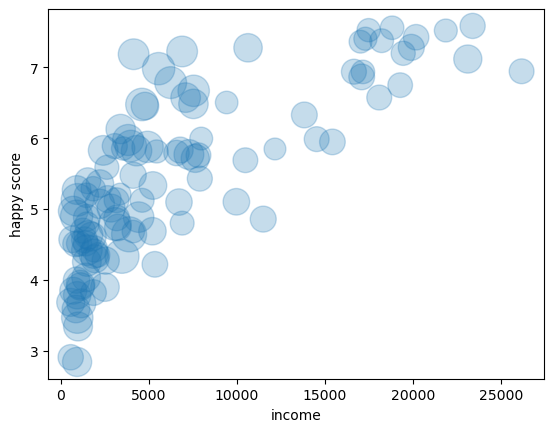

In [16]:
happy = data['happyScore']
income = data['avg_income']
ineq = data['income_inequality']


plt.xlabel('income')
plt.ylabel('happy score')
plt.scatter(income, happy, s = ineq*10, alpha = 0.254)

# Using K-Means to Interpret the Data

In [21]:
from sklearn.cluster import KMeans
import numpy as np
income_happy = np.column_stack((income, happy))
print(income_happy)

[[2.09676000e+03 4.35000000e+00]
 [1.44888000e+03 4.03300000e+00]
 [7.10112000e+03 6.57400000e+00]
 [1.94570400e+04 7.20000000e+00]
 [1.99170000e+04 7.28400000e+00]
 [3.38160000e+03 5.21200000e+00]
 [1.26534000e+03 4.69400000e+00]
 [1.71685050e+04 6.93700000e+00]
 [8.70840000e+02 3.58700000e+00]
 [5.35482000e+03 4.21800000e+00]
 [5.72880000e+02 2.90500000e+00]
 [9.89040000e+02 3.34000000e+00]
 [3.98571000e+03 5.89000000e+00]
 [5.56723500e+03 6.98300000e+00]
 [3.48468000e+03 4.33200000e+00]
 [5.45393333e+03 5.81300000e+00]
 [2.01907800e+04 7.42700000e+00]
 [2.34000400e+04 7.58700000e+00]
 [7.55799000e+03 6.67000000e+00]
 [1.49052000e+03 4.25200000e+00]
 [2.67364286e+03 5.14000000e+00]
 [4.61806286e+03 6.47700000e+00]
 [6.90146667e+03 7.22600000e+00]
 [1.04939550e+04 5.68900000e+00]
 [9.43090500e+03 6.50500000e+00]
 [1.92859600e+04 6.75000000e+00]
 [1.87524000e+03 4.36900000e+00]
 [1.74965100e+04 7.52700000e+00]
 [4.43076000e+03 4.88500000e+00]
 [3.83565333e+03 5.97500000e+00]
 [7.906725

In [31]:
km_res = KMeans(n_clusters=3).fit(income_happy)

In [32]:
km_res.cluster_centers_

array([[2.19912121e+03, 4.75472308e+00],
       [1.87593022e+04, 7.03270000e+00],
       [7.57755711e+03, 5.85080769e+00]])

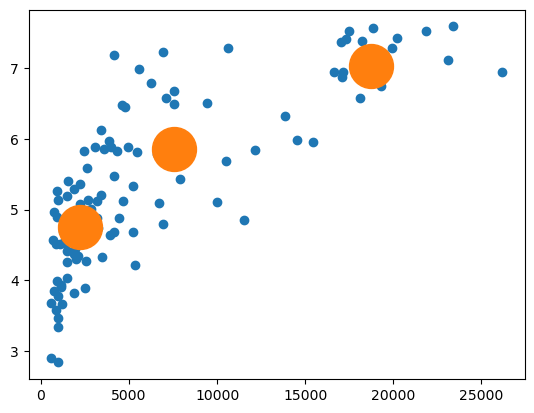

In [33]:
cluster = km_res.cluster_centers_
plt.scatter(income,happy)
plt.scatter(cluster[:,0], cluster[:,1],s=1000)

In [76]:
data.sort_values('income_inequality', inplace = True)

ineq = data[data['income_inequality'] < 40000]
ineq

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
5,Azerbaijan,46.0,5.8,2.27,3381.600000,2931.480000,24.215000,'Central and Eastern Europe',5.212,1.02389,Azerbaijan
91,Slovenia,57.0,7.0,2.14,12174.765000,11071.995000,24.678750,'Central and Eastern Europe',5.848,1.18498,Slovenia
103,Ukraine,39.0,5.1,2.44,4129.680000,3643.520000,26.271111,'Central and Eastern Europe',4.681,0.79907,Ukraine
24,Czech Republic,54.0,6.6,2.13,9430.905000,8363.370000,26.413750,'Central and Eastern Europe',6.505,1.17898,Czech Republic
90,Sweden,67.0,7.8,1.72,17032.755000,15166.605000,26.950000,'Western Europe',7.364,1.33171,Sweden
...,...,...,...,...,...,...,...,...,...,...,...
21,Colombia,65.0,7.9,2.09,4618.062857,2618.674286,54.815714,'Latin America and Caribbean',6.477,0.91861,Colombia
109,Zambia,37.0,5.0,2.61,956.760000,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia
40,Honduras,55.0,7.0,2.46,3080.440000,1757.840000,55.805556,'Latin America and Caribbean',4.788,0.59532,Honduras
14,Botswana,36.0,4.7,2.42,3484.680000,1632.600000,60.460000,'Sub-Saharan Africa',4.332,0.99355,Botswana


In [77]:
ineq.iloc[0]

country                                    Azerbaijan
adjusted_satisfaction                            46.0
avg_satisfaction                                  5.8
std_satisfaction                                 2.27
avg_income                                     3381.6
median_income                                 2931.48
income_inequality                              24.215
region                   'Central and Eastern Europe'
happyScore                                      5.212
GDP                                           1.02389
country.1                                  Azerbaijan
Name: 5, dtype: object

Text(63.72666666666667, 4.642, 'South Africa')

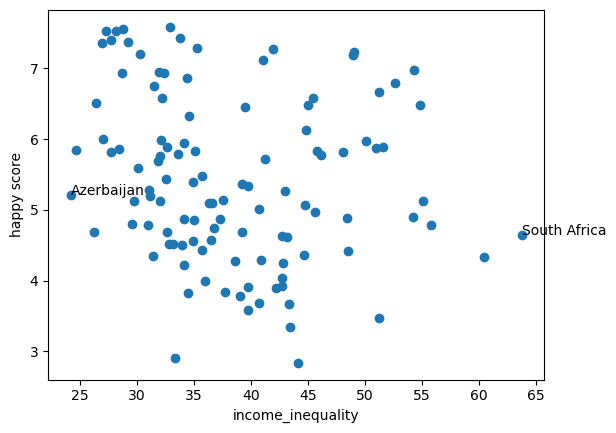

In [79]:
plt.xlabel('income_inequality')
plt.ylabel('happy score')
plt.scatter(ineq['income_inequality'], ineq['happyScore'])
plt.text(ineq.iloc[0]['income_inequality'],
         ineq.iloc[0]['happyScore'],
         ineq.iloc[0]['country'])
plt.text(ineq.iloc[-1]['income_inequality'],
         ineq.iloc[-1]['happyScore'],
         ineq.iloc[-1]['country'])